In \[2\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sb

    from imblearn.over_sampling import RandomOverSampler
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, MinMaxScaler
    from sklearn.feature_selection import SelectKBest, chi2
    from tqdm.notebook import tqdm
    from sklearn import metrics
    from sklearn.svm import SVC
    from xgboost import XGBClassifier
    from sklearn.linear_model import LogisticRegression

    import warnings
    warnings.filterwarnings('ignore')

In \[3\]:

    df = pd.read_csv('parkinsons.csv')

In \[4\]:

    df.head()

Out\[4\]:

|     | name           | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | ... | Shimmer:DDA | NHR     | HNR    | status | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|----------------|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|-----|-------------|---------|--------|--------|----------|----------|-----------|----------|----------|----------|
| 0   | phon_R01_S01_1 | 119.992     | 157.302      | 74.997       | 0.00784        | 0.00007          | 0.00370  | 0.00554  | 0.01109    | 0.04374      | ... | 0.06545     | 0.02211 | 21.033 | 1      | 0.414783 | 0.815285 | -4.813031 | 0.266482 | 2.301442 | 0.284654 |
| 1   | phon_R01_S01_2 | 122.400     | 148.650      | 113.819      | 0.00968        | 0.00008          | 0.00465  | 0.00696  | 0.01394    | 0.06134      | ... | 0.09403     | 0.01929 | 19.085 | 1      | 0.458359 | 0.819521 | -4.075192 | 0.335590 | 2.486855 | 0.368674 |
| 2   | phon_R01_S01_3 | 116.682     | 131.111      | 111.555      | 0.01050        | 0.00009          | 0.00544  | 0.00781  | 0.01633    | 0.05233      | ... | 0.08270     | 0.01309 | 20.651 | 1      | 0.429895 | 0.825288 | -4.443179 | 0.311173 | 2.342259 | 0.332634 |
| 3   | phon_R01_S01_4 | 116.676     | 137.871      | 111.366      | 0.00997        | 0.00009          | 0.00502  | 0.00698  | 0.01505    | 0.05492      | ... | 0.08771     | 0.01353 | 20.644 | 1      | 0.434969 | 0.819235 | -4.117501 | 0.334147 | 2.405554 | 0.368975 |
| 4   | phon_R01_S01_5 | 116.014     | 141.781      | 110.655      | 0.01284        | 0.00011          | 0.00655  | 0.00908  | 0.01966    | 0.06425      | ... | 0.10470     | 0.01767 | 19.649 | 1      | 0.417356 | 0.823484 | -3.747787 | 0.234513 | 2.332180 | 0.410335 |

5 rows × 24 columns

In \[5\]:

    df.tail()

Out\[5\]:

|     | name           | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | ... | Shimmer:DDA | NHR     | HNR    | status | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|----------------|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|-----|-------------|---------|--------|--------|----------|----------|-----------|----------|----------|----------|
| 190 | phon_R01_S50_2 | 174.188     | 230.978      | 94.261       | 0.00459        | 0.00003          | 0.00263  | 0.00259  | 0.00790    | 0.04087      | ... | 0.07008     | 0.02764 | 19.517 | 0      | 0.448439 | 0.657899 | -6.538586 | 0.121952 | 2.657476 | 0.133050 |
| 191 | phon_R01_S50_3 | 209.516     | 253.017      | 89.488       | 0.00564        | 0.00003          | 0.00331  | 0.00292  | 0.00994    | 0.02751      | ... | 0.04812     | 0.01810 | 19.147 | 0      | 0.431674 | 0.683244 | -6.195325 | 0.129303 | 2.784312 | 0.168895 |
| 192 | phon_R01_S50_4 | 174.688     | 240.005      | 74.287       | 0.01360        | 0.00008          | 0.00624  | 0.00564  | 0.01873    | 0.02308      | ... | 0.03804     | 0.10715 | 17.883 | 0      | 0.407567 | 0.655683 | -6.787197 | 0.158453 | 2.679772 | 0.131728 |
| 193 | phon_R01_S50_5 | 198.764     | 396.961      | 74.904       | 0.00740        | 0.00004          | 0.00370  | 0.00390  | 0.01109    | 0.02296      | ... | 0.03794     | 0.07223 | 19.020 | 0      | 0.451221 | 0.643956 | -6.744577 | 0.207454 | 2.138608 | 0.123306 |
| 194 | phon_R01_S50_6 | 214.289     | 260.277      | 77.973       | 0.00567        | 0.00003          | 0.00295  | 0.00317  | 0.00885    | 0.01884      | ... | 0.03078     | 0.04398 | 21.209 | 0      | 0.462803 | 0.664357 | -5.724056 | 0.190667 | 2.555477 | 0.148569 |

5 rows × 24 columns

In \[6\]:

    df.info

Out\[6\]:

    <bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
    0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
    1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
    2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
    3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
    4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
    ..              ...          ...           ...           ...             ...   
    190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
    191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
    192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
    193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
    194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

         MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
    0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
    1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
    2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
    3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
    4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
    ..                ...       ...       ...         ...           ...  ...   
    190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
    191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
    192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
    193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
    194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

         Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
    0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
    1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
    2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
    3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
    4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
    ..           ...      ...     ...     ...       ...       ...       ...   
    190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
    191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
    192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
    193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
    194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

          spread2        D2       PPE  
    0    0.266482  2.301442  0.284654  
    1    0.335590  2.486855  0.368674  
    2    0.311173  2.342259  0.332634  
    3    0.334147  2.405554  0.368975  
    4    0.234513  2.332180  0.410335  
    ..        ...       ...       ...  
    190  0.121952  2.657476  0.133050  
    191  0.129303  2.784312  0.168895  
    192  0.158453  2.679772  0.131728  
    193  0.207454  2.138608  0.123306  
    194  0.190667  2.555477  0.148569  

    [195 rows x 24 columns]>

In \[7\]:

    df.describe

Out\[7\]:

    <bound method NDFrame.describe of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
    0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
    1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
    2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
    3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
    4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
    ..              ...          ...           ...           ...             ...   
    190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
    191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
    192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
    193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
    194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

         MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
    0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
    1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
    2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
    3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
    4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
    ..                ...       ...       ...         ...           ...  ...   
    190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
    191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
    192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
    193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
    194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

         Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
    0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
    1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
    2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
    3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
    4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
    ..           ...      ...     ...     ...       ...       ...       ...   
    190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
    191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
    192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
    193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
    194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

          spread2        D2       PPE  
    0    0.266482  2.301442  0.284654  
    1    0.335590  2.486855  0.368674  
    2    0.311173  2.342259  0.332634  
    3    0.334147  2.405554  0.368975  
    4    0.234513  2.332180  0.410335  
    ..        ...       ...       ...  
    190  0.121952  2.657476  0.133050  
    191  0.129303  2.784312  0.168895  
    192  0.158453  2.679772  0.131728  
    193  0.207454  2.138608  0.123306  
    194  0.190667  2.555477  0.148569  

    [195 rows x 24 columns]>

In \[8\]:

    df.shape

Out\[8\]:

    (195, 24)

In \[9\]:

    df.size

Out\[9\]:

    4680

In \[10\]:

    df.columns

Out\[10\]:

    Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
           'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
           'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
           'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
           'spread1', 'spread2', 'D2', 'PPE'],
          dtype='object')

In \[11\]:

    # Data Cleaning

    df = df.groupby('name').mean().reset_index()
    df.drop('name', axis=1, inplace=True)

In \[12\]:

    df

Out\[12\]:

|     | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | MDVP:Shimmer(dB) | ... | Shimmer:DDA | NHR     | HNR    | status | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|------------------|-----|-------------|---------|--------|--------|----------|----------|-----------|----------|----------|----------|
| 0   | 119.992     | 157.302      | 74.997       | 0.00784        | 0.00007          | 0.00370  | 0.00554  | 0.01109    | 0.04374      | 0.426            | ... | 0.06545     | 0.02211 | 21.033 | 1.0    | 0.414783 | 0.815285 | -4.813031 | 0.266482 | 2.301442 | 0.284654 |
| 1   | 122.400     | 148.650      | 113.819      | 0.00968        | 0.00008          | 0.00465  | 0.00696  | 0.01394    | 0.06134      | 0.626            | ... | 0.09403     | 0.01929 | 19.085 | 1.0    | 0.458359 | 0.819521 | -4.075192 | 0.335590 | 2.486855 | 0.368674 |
| 2   | 116.682     | 131.111      | 111.555      | 0.01050        | 0.00009          | 0.00544  | 0.00781  | 0.01633    | 0.05233      | 0.482            | ... | 0.08270     | 0.01309 | 20.651 | 1.0    | 0.429895 | 0.825288 | -4.443179 | 0.311173 | 2.342259 | 0.332634 |
| 3   | 116.676     | 137.871      | 111.366      | 0.00997        | 0.00009          | 0.00502  | 0.00698  | 0.01505    | 0.05492      | 0.517            | ... | 0.08771     | 0.01353 | 20.644 | 1.0    | 0.434969 | 0.819235 | -4.117501 | 0.334147 | 2.405554 | 0.368975 |
| 4   | 116.014     | 141.781      | 110.655      | 0.01284        | 0.00011          | 0.00655  | 0.00908  | 0.01966    | 0.06425      | 0.584            | ... | 0.10470     | 0.01767 | 19.649 | 1.0    | 0.417356 | 0.823484 | -3.747787 | 0.234513 | 2.332180 | 0.410335 |
| ... | ...         | ...          | ...          | ...            | ...              | ...      | ...      | ...        | ...          | ...              | ... | ...         | ...     | ...    | ...    | ...      | ...      | ...       | ...      | ...      | ...      |
| 190 | 174.188     | 230.978      | 94.261       | 0.00459        | 0.00003          | 0.00263  | 0.00259  | 0.00790    | 0.04087      | 0.405            | ... | 0.07008     | 0.02764 | 19.517 | 0.0    | 0.448439 | 0.657899 | -6.538586 | 0.121952 | 2.657476 | 0.133050 |
| 191 | 209.516     | 253.017      | 89.488       | 0.00564        | 0.00003          | 0.00331  | 0.00292  | 0.00994    | 0.02751      | 0.263            | ... | 0.04812     | 0.01810 | 19.147 | 0.0    | 0.431674 | 0.683244 | -6.195325 | 0.129303 | 2.784312 | 0.168895 |
| 192 | 174.688     | 240.005      | 74.287       | 0.01360        | 0.00008          | 0.00624  | 0.00564  | 0.01873    | 0.02308      | 0.256            | ... | 0.03804     | 0.10715 | 17.883 | 0.0    | 0.407567 | 0.655683 | -6.787197 | 0.158453 | 2.679772 | 0.131728 |
| 193 | 198.764     | 396.961      | 74.904       | 0.00740        | 0.00004          | 0.00370  | 0.00390  | 0.01109    | 0.02296      | 0.241            | ... | 0.03794     | 0.07223 | 19.020 | 0.0    | 0.451221 | 0.643956 | -6.744577 | 0.207454 | 2.138608 | 0.123306 |
| 194 | 214.289     | 260.277      | 77.973       | 0.00567        | 0.00003          | 0.00295  | 0.00317  | 0.00885    | 0.01884      | 0.190            | ... | 0.03078     | 0.04398 | 21.209 | 0.0    | 0.462803 | 0.664357 | -5.724056 | 0.190667 | 2.555477 | 0.148569 |

195 rows × 23 columns

In \[13\]:

    # remove the highly correlated features except for the target column.

    columns = list(df.columns)
    for col in columns:
        if col == 'class':
            continue

        filtered_columns = [col]
        for col1 in df.columns:
            if((col == col1) | (col == 'class')):
                continue

        val = df[col].corr(df[col1])

        if val > 0.7:
    # If the correlation between the two
    # features is more than 0.7 remove
        columns.remove(col1)
        continue
    else:
        filtered_columns.append(col1)

    # After each iteration filter out the columns
    # which are not highly correlated features.
        df = df[filtered_columns]
    df.shape

Out\[13\]:

    (195, 11)

In \[18\]:

    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import seaborn as sns

In \[19\]:

    # Step 1: Load the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    parkinsons_df = pd.read_csv(url)

In \[20\]:

    # Step 2: Data Preprocessing
    # Dropping unnecessary columns
    parkinsons_df.drop(['name'], axis=1, inplace=True)

In \[21\]:

    df

Out\[21\]:

|     | D2       | spread2  | spread1   | DFA      | RPDE     | status | HNR    | MDVP:Jitter(%) | MDVP:Flo(Hz) | MDVP:Fhi(Hz) | MDVP:Fo(Hz) |
|-----|----------|----------|-----------|----------|----------|--------|--------|----------------|--------------|--------------|-------------|
| 0   | 2.301442 | 0.266482 | -4.813031 | 0.815285 | 0.414783 | 1.0    | 21.033 | 0.00784        | 74.997       | 157.302      | 119.992     |
| 1   | 2.486855 | 0.335590 | -4.075192 | 0.819521 | 0.458359 | 1.0    | 19.085 | 0.00968        | 113.819      | 148.650      | 122.400     |
| 2   | 2.342259 | 0.311173 | -4.443179 | 0.825288 | 0.429895 | 1.0    | 20.651 | 0.01050        | 111.555      | 131.111      | 116.682     |
| 3   | 2.405554 | 0.334147 | -4.117501 | 0.819235 | 0.434969 | 1.0    | 20.644 | 0.00997        | 111.366      | 137.871      | 116.676     |
| 4   | 2.332180 | 0.234513 | -3.747787 | 0.823484 | 0.417356 | 1.0    | 19.649 | 0.01284        | 110.655      | 141.781      | 116.014     |
| ... | ...      | ...      | ...       | ...      | ...      | ...    | ...    | ...            | ...          | ...          | ...         |
| 190 | 2.657476 | 0.121952 | -6.538586 | 0.657899 | 0.448439 | 0.0    | 19.517 | 0.00459        | 94.261       | 230.978      | 174.188     |
| 191 | 2.784312 | 0.129303 | -6.195325 | 0.683244 | 0.431674 | 0.0    | 19.147 | 0.00564        | 89.488       | 253.017      | 209.516     |
| 192 | 2.679772 | 0.158453 | -6.787197 | 0.655683 | 0.407567 | 0.0    | 17.883 | 0.01360        | 74.287       | 240.005      | 174.688     |
| 193 | 2.138608 | 0.207454 | -6.744577 | 0.643956 | 0.451221 | 0.0    | 19.020 | 0.00740        | 74.904       | 396.961      | 198.764     |
| 194 | 2.555477 | 0.190667 | -5.724056 | 0.664357 | 0.462803 | 0.0    | 21.209 | 0.00567        | 77.973       | 260.277      | 214.289     |

195 rows × 11 columns

In \[22\]:

    # Splitting features and target variable
    X = parkinsons_df.drop(['status'], axis=1)
    y = parkinsons_df['status']

In \[24\]:

    X

Out\[24\]:

|     | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | MDVP:Shimmer(dB) | ... | MDVP:APQ | Shimmer:DDA | NHR     | HNR    | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|------------------|-----|----------|-------------|---------|--------|----------|----------|-----------|----------|----------|----------|
| 0   | 119.992     | 157.302      | 74.997       | 0.00784        | 0.00007          | 0.00370  | 0.00554  | 0.01109    | 0.04374      | 0.426            | ... | 0.02971  | 0.06545     | 0.02211 | 21.033 | 0.414783 | 0.815285 | -4.813031 | 0.266482 | 2.301442 | 0.284654 |
| 1   | 122.400     | 148.650      | 113.819      | 0.00968        | 0.00008          | 0.00465  | 0.00696  | 0.01394    | 0.06134      | 0.626            | ... | 0.04368  | 0.09403     | 0.01929 | 19.085 | 0.458359 | 0.819521 | -4.075192 | 0.335590 | 2.486855 | 0.368674 |
| 2   | 116.682     | 131.111      | 111.555      | 0.01050        | 0.00009          | 0.00544  | 0.00781  | 0.01633    | 0.05233      | 0.482            | ... | 0.03590  | 0.08270     | 0.01309 | 20.651 | 0.429895 | 0.825288 | -4.443179 | 0.311173 | 2.342259 | 0.332634 |
| 3   | 116.676     | 137.871      | 111.366      | 0.00997        | 0.00009          | 0.00502  | 0.00698  | 0.01505    | 0.05492      | 0.517            | ... | 0.03772  | 0.08771     | 0.01353 | 20.644 | 0.434969 | 0.819235 | -4.117501 | 0.334147 | 2.405554 | 0.368975 |
| 4   | 116.014     | 141.781      | 110.655      | 0.01284        | 0.00011          | 0.00655  | 0.00908  | 0.01966    | 0.06425      | 0.584            | ... | 0.04465  | 0.10470     | 0.01767 | 19.649 | 0.417356 | 0.823484 | -3.747787 | 0.234513 | 2.332180 | 0.410335 |
| ... | ...         | ...          | ...          | ...            | ...              | ...      | ...      | ...        | ...          | ...              | ... | ...      | ...         | ...     | ...    | ...      | ...      | ...       | ...      | ...      | ...      |
| 190 | 174.188     | 230.978      | 94.261       | 0.00459        | 0.00003          | 0.00263  | 0.00259  | 0.00790    | 0.04087      | 0.405            | ... | 0.02745  | 0.07008     | 0.02764 | 19.517 | 0.448439 | 0.657899 | -6.538586 | 0.121952 | 2.657476 | 0.133050 |
| 191 | 209.516     | 253.017      | 89.488       | 0.00564        | 0.00003          | 0.00331  | 0.00292  | 0.00994    | 0.02751      | 0.263            | ... | 0.01879  | 0.04812     | 0.01810 | 19.147 | 0.431674 | 0.683244 | -6.195325 | 0.129303 | 2.784312 | 0.168895 |
| 192 | 174.688     | 240.005      | 74.287       | 0.01360        | 0.00008          | 0.00624  | 0.00564  | 0.01873    | 0.02308      | 0.256            | ... | 0.01667  | 0.03804     | 0.10715 | 17.883 | 0.407567 | 0.655683 | -6.787197 | 0.158453 | 2.679772 | 0.131728 |
| 193 | 198.764     | 396.961      | 74.904       | 0.00740        | 0.00004          | 0.00370  | 0.00390  | 0.01109    | 0.02296      | 0.241            | ... | 0.01588  | 0.03794     | 0.07223 | 19.020 | 0.451221 | 0.643956 | -6.744577 | 0.207454 | 2.138608 | 0.123306 |
| 194 | 214.289     | 260.277      | 77.973       | 0.00567        | 0.00003          | 0.00295  | 0.00317  | 0.00885    | 0.01884      | 0.190            | ... | 0.01373  | 0.03078     | 0.04398 | 21.209 | 0.462803 | 0.664357 | -5.724056 | 0.190667 | 2.555477 | 0.148569 |

195 rows × 22 columns

In \[23\]:

    y

Out\[23\]:

    0      1
    1      1
    2      1
    3      1
    4      1
          ..
    190    0
    191    0
    192    0
    193    0
    194    0
    Name: status, Length: 195, dtype: int64

In \[25\]:

    # Step 3: Exploratory Data Analysis (EDA)
    # Let's plot a histogram of some features
    parkinsons_df.hist(bins=20, figsize=(15,10))
    plt.show()

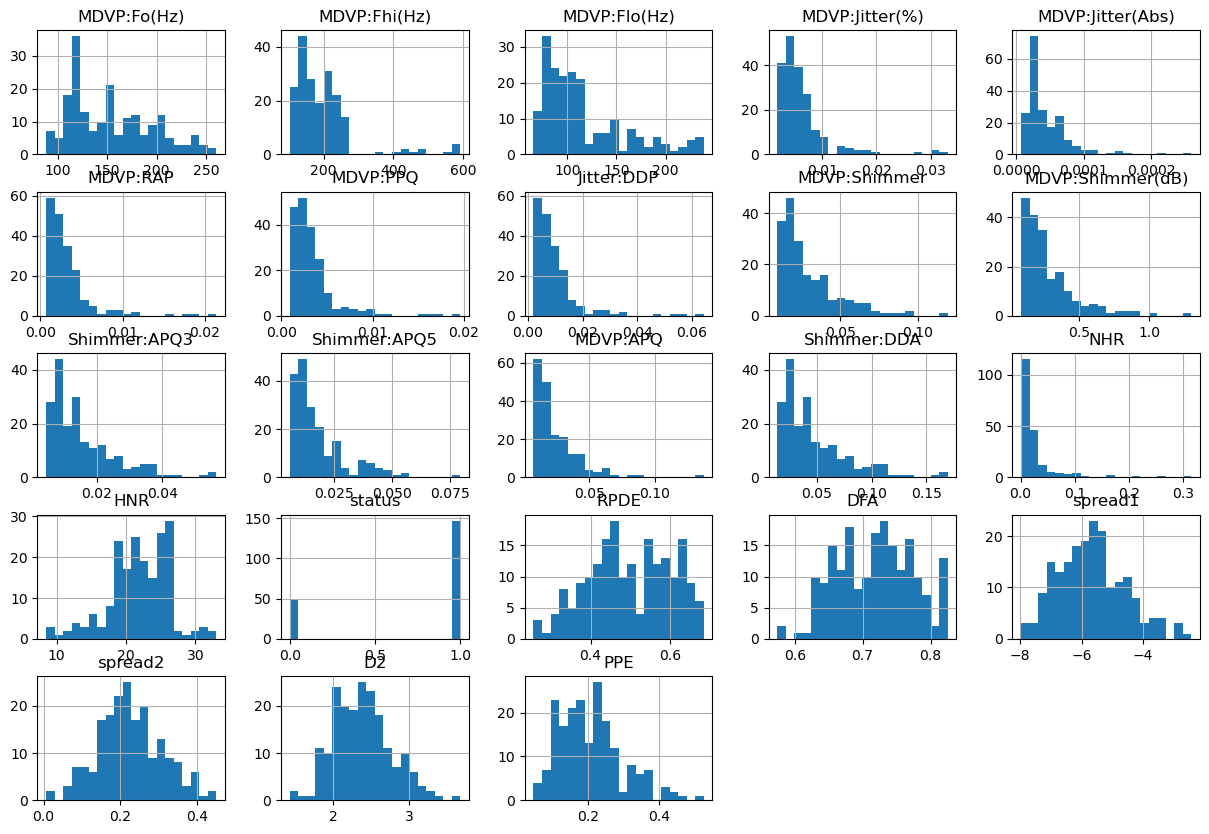

In \[26\]:

    # Step 4: Model Training and Prediction
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In \[30\]:

    X_train

Out\[30\]:

|     | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | MDVP:Shimmer(dB) | ... | MDVP:APQ | Shimmer:DDA | NHR     | HNR    | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|------------------|-----|----------|-------------|---------|--------|----------|----------|-----------|----------|----------|----------|
| 5   | 120.552     | 131.162      | 113.787      | 0.00968        | 0.00008          | 0.00463  | 0.00750  | 0.01388    | 0.04701      | 0.456            | ... | 0.03243  | 0.06985     | 0.01222 | 21.378 | 0.415564 | 0.825069 | -4.242867 | 0.299111 | 2.187560 | 0.357775 |
| 135 | 110.453     | 127.611      | 105.554      | 0.00494        | 0.00004          | 0.00244  | 0.00315  | 0.00731    | 0.04128      | 0.379            | ... | 0.03316  | 0.06688     | 0.02529 | 17.707 | 0.653427 | 0.706687 | -5.333619 | 0.322044 | 2.631793 | 0.228319 |
| 122 | 138.190     | 203.522      | 83.340       | 0.00704        | 0.00005          | 0.00406  | 0.00398  | 0.01218    | 0.04479      | 0.441            | ... | 0.03220  | 0.07761     | 0.01968 | 18.305 | 0.538016 | 0.741480 | -5.418787 | 0.160267 | 2.090438 | 0.229892 |
| 167 | 260.105     | 264.919      | 237.303      | 0.00339        | 0.00001          | 0.00205  | 0.00186  | 0.00616    | 0.02030      | 0.197            | ... | 0.01367  | 0.03557     | 0.00910 | 21.083 | 0.440988 | 0.628058 | -7.517934 | 0.160414 | 1.881767 | 0.075587 |
| 85  | 180.978     | 200.125      | 155.495      | 0.00406        | 0.00002          | 0.00220  | 0.00244  | 0.00659    | 0.03852      | 0.331            | ... | 0.02877  | 0.06321     | 0.02782 | 16.176 | 0.583574 | 0.727747 | -5.657899 | 0.315903 | 3.098256 | 0.200423 |
| ... | ...         | ...          | ...          | ...            | ...              | ...      | ...      | ...        | ...          | ...              | ... | ...      | ...         | ...     | ...    | ...      | ...      | ...       | ...      | ...      | ...      |
| 106 | 155.078     | 163.736      | 144.148      | 0.00168        | 0.00001          | 0.00068  | 0.00092  | 0.00204    | 0.01064      | 0.097            | ... | 0.00928  | 0.01567     | 0.00233 | 29.746 | 0.334171 | 0.677930 | -6.981201 | 0.184550 | 2.129924 | 0.106802 |
| 14  | 152.845     | 163.305      | 75.836       | 0.00294        | 0.00002          | 0.00121  | 0.00149  | 0.00364    | 0.01828      | 0.158            | ... | 0.01246  | 0.03191     | 0.00609 | 24.922 | 0.474791 | 0.654027 | -6.105098 | 0.203653 | 2.125618 | 0.170100 |
| 92  | 148.272     | 164.989      | 142.299      | 0.00459        | 0.00003          | 0.00250  | 0.00256  | 0.00750    | 0.04190      | 0.383            | ... | 0.03051  | 0.07150     | 0.01914 | 18.780 | 0.454444 | 0.734504 | -5.952058 | 0.087840 | 2.344336 | 0.186489 |
| 179 | 148.143     | 155.982      | 135.041      | 0.00392        | 0.00003          | 0.00204  | 0.00231  | 0.00612    | 0.01450      | 0.131            | ... | 0.01263  | 0.02175     | 0.00540 | 23.683 | 0.398499 | 0.778349 | -5.711205 | 0.240875 | 2.845109 | 0.192730 |
| 102 | 139.224     | 586.567      | 66.157       | 0.03011        | 0.00022          | 0.01854  | 0.01628  | 0.05563    | 0.09419      | 0.930            | ... | 0.06023  | 0.16654     | 0.25930 | 10.489 | 0.596362 | 0.641418 | -3.269487 | 0.270641 | 2.690917 | 0.444774 |

156 rows × 22 columns

In \[29\]:

    X_test

Out\[29\]:

|     | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | MDVP:Shimmer(dB) | ... | MDVP:APQ | Shimmer:DDA | NHR     | HNR    | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|------------------|-----|----------|-------------|---------|--------|----------|----------|-----------|----------|----------|----------|
| 138 | 112.239     | 126.609      | 104.095      | 0.00472        | 0.000040         | 0.00238  | 0.00290  | 0.00715    | 0.05643      | 0.517            | ... | 0.04451  | 0.09211     | 0.02629 | 17.366 | 0.640945 | 0.701404 | -5.634576 | 0.306014 | 2.419253 | 0.209191 |
| 16  | 144.188     | 349.259      | 82.764       | 0.00544        | 0.000040         | 0.00211  | 0.00292  | 0.00632    | 0.02047      | 0.192            | ... | 0.02074  | 0.02908     | 0.01859 | 22.333 | 0.567380 | 0.644692 | -5.440040 | 0.239764 | 2.264501 | 0.218164 |
| 155 | 117.870     | 127.349      | 95.654       | 0.00647        | 0.000050         | 0.00356  | 0.00300  | 0.01067    | 0.03087      | 0.276            | ... | 0.02402  | 0.04977     | 0.02631 | 22.431 | 0.628300 | 0.652025 | -3.583722 | 0.207914 | 2.439597 | 0.206256 |
| 96  | 159.116     | 168.913      | 144.811      | 0.00342        | 0.000020         | 0.00178  | 0.00184  | 0.00535    | 0.03381      | 0.307            | ... | 0.02809  | 0.05417     | 0.00852 | 22.663 | 0.366329 | 0.693429 | -6.417440 | 0.194627 | 2.473239 | 0.151709 |
| 68  | 143.533     | 162.215      | 65.809       | 0.01101        | 0.000080         | 0.00647  | 0.00467  | 0.01941    | 0.05384      | 0.478            | ... | 0.03392  | 0.09455     | 0.04882 | 20.338 | 0.513237 | 0.731444 | -5.869750 | 0.151814 | 2.118496 | 0.185580 |
| 153 | 121.345     | 139.644      | 98.250       | 0.00684        | 0.000060         | 0.00388  | 0.00332  | 0.01164    | 0.02534      | 0.241            | ... | 0.02056  | 0.04019     | 0.04179 | 21.520 | 0.566867 | 0.670475 | -4.865194 | 0.246404 | 2.013530 | 0.168581 |
| 55  | 109.860     | 126.358      | 104.437      | 0.00874        | 0.000080         | 0.00398  | 0.00539  | 0.01193    | 0.03209      | 0.307            | ... | 0.02454  | 0.05368     | 0.01180 | 20.767 | 0.558586 | 0.811843 | -4.333543 | 0.221727 | 2.014606 | 0.344834 |
| 15  | 142.167     | 217.455      | 83.159       | 0.00369        | 0.000030         | 0.00157  | 0.00203  | 0.00471    | 0.01503      | 0.126            | ... | 0.01359  | 0.02316     | 0.00839 | 25.175 | 0.565924 | 0.658245 | -5.340115 | 0.210185 | 2.205546 | 0.234589 |
| 112 | 204.664     | 221.300      | 189.621      | 0.00841        | 0.000040         | 0.00502  | 0.00485  | 0.01506    | 0.02378      | 0.210            | ... | 0.01767  | 0.03831     | 0.01316 | 21.305 | 0.498877 | 0.722085 | -4.876336 | 0.212054 | 2.376749 | 0.268144 |
| 111 | 208.519     | 220.315      | 199.020      | 0.00609        | 0.000030         | 0.00368  | 0.00339  | 0.01105    | 0.01761      | 0.155            | ... | 0.01307  | 0.02855     | 0.00830 | 22.407 | 0.338097 | 0.712466 | -6.471427 | 0.184378 | 2.502336 | 0.136390 |
| 184 | 116.848     | 217.552      | 99.503       | 0.00531        | 0.000050         | 0.00260  | 0.00346  | 0.00780    | 0.01795      | 0.163            | ... | 0.01756  | 0.02429     | 0.01179 | 22.085 | 0.663842 | 0.656516 | -5.198864 | 0.206768 | 2.120412 | 0.252404 |
| 18  | 153.046     | 175.829      | 68.623       | 0.00742        | 0.000050         | 0.00364  | 0.00432  | 0.01092    | 0.05517      | 0.542            | ... | 0.05767  | 0.07413     | 0.03160 | 17.280 | 0.665318 | 0.719467 | -3.949079 | 0.357870 | 3.109010 | 0.377429 |
| 82  | 100.960     | 110.019      | 95.628       | 0.00606        | 0.000060         | 0.00351  | 0.00348  | 0.01053    | 0.02427      | 0.216            | ... | 0.01751  | 0.04114     | 0.01237 | 20.536 | 0.554610 | 0.787896 | -5.022288 | 0.146948 | 2.428306 | 0.264666 |
| 9   | 95.056      | 120.103      | 91.226       | 0.00532        | 0.000060         | 0.00268  | 0.00332  | 0.00803    | 0.02838      | 0.255            | ... | 0.02444  | 0.04324     | 0.01022 | 21.862 | 0.547037 | 0.798463 | -5.011879 | 0.325996 | 2.432792 | 0.271362 |
| 164 | 102.273     | 142.830      | 85.902       | 0.00907        | 0.000090         | 0.00493  | 0.00461  | 0.01480    | 0.02814      | 0.272            | ... | 0.02073  | 0.04736     | 0.03882 | 18.447 | 0.671378 | 0.674562 | -2.929379 | 0.396746 | 2.560422 | 0.367233 |
| 117 | 170.756     | 450.247      | 79.032       | 0.00555        | 0.000030         | 0.00244  | 0.00261  | 0.00731    | 0.01725      | 0.175            | ... | 0.01652  | 0.02270     | 0.01802 | 25.690 | 0.486738 | 0.676023 | -4.597834 | 0.372114 | 2.975889 | 0.282780 |
| 69  | 148.090     | 162.824      | 67.343       | 0.00762        | 0.000050         | 0.00467  | 0.00354  | 0.01400    | 0.05428      | 0.497            | ... | 0.03635  | 0.10070     | 0.02431 | 21.718 | 0.487407 | 0.727313 | -6.261141 | 0.120956 | 2.137075 | 0.141958 |
| 113 | 210.141     | 232.706      | 185.258      | 0.00534        | 0.000030         | 0.00321  | 0.00280  | 0.00964    | 0.01680      | 0.149            | ... | 0.01301  | 0.02583     | 0.00620 | 23.671 | 0.441097 | 0.722254 | -5.963040 | 0.250283 | 2.489191 | 0.177807 |
| 192 | 174.688     | 240.005      | 74.287       | 0.01360        | 0.000080         | 0.00624  | 0.00564  | 0.01873    | 0.02308      | 0.256            | ... | 0.01667  | 0.03804     | 0.10715 | 17.883 | 0.407567 | 0.655683 | -6.787197 | 0.158453 | 2.679772 | 0.131728 |
| 119 | 217.116     | 233.481      | 93.978       | 0.00404        | 0.000020         | 0.00127  | 0.00128  | 0.00381    | 0.01299      | 0.124            | ... | 0.01075  | 0.02038     | 0.00681 | 24.581 | 0.462516 | 0.582710 | -5.517173 | 0.389295 | 2.925862 | 0.220657 |
| 123 | 182.018     | 197.173      | 79.187       | 0.00842        | 0.000050         | 0.00506  | 0.00449  | 0.01517    | 0.02503      | 0.231            | ... | 0.01931  | 0.04115     | 0.01813 | 18.784 | 0.589956 | 0.732903 | -5.445140 | 0.142466 | 2.174306 | 0.215558 |
| 144 | 202.544     | 241.350      | 164.168      | 0.00254        | 0.000010         | 0.00100  | 0.00133  | 0.00301    | 0.02662      | 0.228            | ... | 0.02006  | 0.04426     | 0.01049 | 20.680 | 0.497480 | 0.630409 | -6.132663 | 0.220617 | 2.576563 | 0.159777 |
| 66  | 140.341     | 159.774      | 67.021       | 0.00817        | 0.000060         | 0.00430  | 0.00440  | 0.01289    | 0.03198      | 0.313            | ... | 0.02428  | 0.05490     | 0.02183 | 19.560 | 0.460139 | 0.720908 | -5.409423 | 0.226850 | 2.359973 | 0.226156 |
| 45  | 242.852     | 255.034      | 227.911      | 0.00225        | 0.000009         | 0.00117  | 0.00139  | 0.00350    | 0.01494      | 0.134            | ... | 0.01014  | 0.02542     | 0.00476 | 25.032 | 0.431285 | 0.638928 | -6.995820 | 0.102083 | 2.365800 | 0.102706 |
| 158 | 126.144     | 154.284      | 97.543       | 0.00975        | 0.000080         | 0.00593  | 0.00454  | 0.01778    | 0.02852      | 0.266            | ... | 0.02157  | 0.04499     | 0.03828 | 21.534 | 0.635015 | 0.627337 | -5.070096 | 0.280091 | 2.892300 | 0.249703 |
| 115 | 151.872     | 492.892      | 69.085       | 0.00856        | 0.000060         | 0.00404  | 0.00385  | 0.01211    | 0.01843      | 0.235            | ... | 0.01271  | 0.02389     | 0.06051 | 23.693 | 0.407701 | 0.662668 | -4.673241 | 0.261549 | 2.702355 | 0.274407 |
| 67  | 136.969     | 166.607      | 66.004       | 0.00923        | 0.000070         | 0.00507  | 0.00463  | 0.01520    | 0.03111      | 0.308            | ... | 0.02603  | 0.04914     | 0.02659 | 19.979 | 0.498133 | 0.729067 | -5.324574 | 0.205660 | 2.291558 | 0.226247 |
| 93  | 152.125     | 161.469      | 76.596       | 0.00382        | 0.000030         | 0.00191  | 0.00226  | 0.00574    | 0.05925      | 0.637            | ... | 0.04398  | 0.10024     | 0.01211 | 20.969 | 0.447456 | 0.697790 | -6.152551 | 0.173520 | 2.080121 | 0.160809 |
| 30  | 197.076     | 206.896      | 192.055      | 0.00289        | 0.000010         | 0.00166  | 0.00168  | 0.00498    | 0.01098      | 0.097            | ... | 0.00802  | 0.01689     | 0.00339 | 26.775 | 0.422229 | 0.741367 | -7.348300 | 0.177551 | 1.743867 | 0.085569 |
| 101 | 128.451     | 150.449      | 75.632       | 0.01551        | 0.000120         | 0.00905  | 0.00909  | 0.02716    | 0.06170      | 0.584            | ... | 0.05174  | 0.09669     | 0.11843 | 15.060 | 0.639808 | 0.643327 | -4.202730 | 0.310163 | 2.638279 | 0.356881 |
| 118 | 178.285     | 442.824      | 82.063       | 0.00462        | 0.000030         | 0.00157  | 0.00194  | 0.00472    | 0.01279      | 0.129            | ... | 0.01151  | 0.01851     | 0.00856 | 25.020 | 0.470422 | 0.655239 | -4.913137 | 0.393056 | 2.816781 | 0.251972 |
| 75  | 110.707     | 122.611      | 105.007      | 0.00516        | 0.000050         | 0.00277  | 0.00289  | 0.00831    | 0.02215      | 0.206            | ... | 0.01715  | 0.03851     | 0.00472 | 25.197 | 0.463514 | 0.807217 | -5.477592 | 0.315074 | 1.862092 | 0.228624 |
| 24  | 163.656     | 200.841      | 76.779       | 0.00742        | 0.000050         | 0.00380  | 0.00390  | 0.01140    | 0.01659      | 0.164            | ... | 0.01497  | 0.02214     | 0.01778 | 23.831 | 0.397937 | 0.732479 | -5.557447 | 0.220890 | 2.692176 | 0.215961 |
| 172 | 110.739     | 113.597      | 100.139      | 0.00356        | 0.000030         | 0.00170  | 0.00200  | 0.00510    | 0.01484      | 0.133            | ... | 0.01285  | 0.02261     | 0.00430 | 26.550 | 0.369090 | 0.776158 | -6.085567 | 0.192375 | 1.889002 | 0.174152 |
| 127 | 166.888     | 198.966      | 79.512       | 0.00638        | 0.000040         | 0.00368  | 0.00351  | 0.01104    | 0.02857      | 0.257            | ... | 0.02301  | 0.04641     | 0.01796 | 18.330 | 0.585169 | 0.736964 | -5.825257 | 0.115697 | 1.996146 | 0.196535 |
| 169 | 240.301     | 245.135      | 219.783      | 0.00517        | 0.000020         | 0.00316  | 0.00283  | 0.00949    | 0.02018      | 0.212            | ... | 0.01344  | 0.03529     | 0.00965 | 21.020 | 0.371837 | 0.646167 | -7.169701 | 0.073298 | 2.266432 | 0.100881 |
| 19  | 156.405     | 189.398      | 142.822      | 0.00768        | 0.000050         | 0.00372  | 0.00399  | 0.01116    | 0.03995      | 0.348            | ... | 0.04310  | 0.05164     | 0.03365 | 17.153 | 0.649554 | 0.686080 | -4.554466 | 0.340176 | 2.856676 | 0.322111 |
| 168 | 197.569     | 217.627      | 90.794       | 0.00803        | 0.000040         | 0.00490  | 0.00448  | 0.01470    | 0.02177      | 0.189            | ... | 0.01439  | 0.03836     | 0.01337 | 19.269 | 0.372222 | 0.725216 | -5.736781 | 0.164529 | 2.882450 | 0.202879 |
| 73  | 112.014     | 588.518      | 107.024      | 0.00533        | 0.000050         | 0.00268  | 0.00329  | 0.00805    | 0.02448      | 0.226            | ... | 0.01956  | 0.04120     | 0.00623 | 24.178 | 0.509127 | 0.789532 | -5.389129 | 0.306636 | 1.928708 | 0.225461 |

39 rows × 22 columns

In \[28\]:

    y_train

Out\[28\]:

    5      1
    135    1
    122    1
    167    0
    85     1
          ..
    106    1
    14     1
    92     1
    179    1
    102    1
    Name: status, Length: 156, dtype: int64

In \[27\]:

    y_test

Out\[27\]:

    138    1
    16     1
    155    1
    96     1
    68     1
    153    1
    55     1
    15     1
    112    1
    111    1
    184    0
    18     1
    82     1
    9      1
    164    1
    117    1
    69     1
    113    1
    192    0
    119    1
    123    1
    144    1
    66     1
    45     0
    158    1
    115    1
    67     1
    93     1
    30     0
    101    1
    118    1
    75     1
    24     1
    172    0
    127    1
    169    0
    19     1
    168    0
    73     1
    Name: status, dtype: int64

In \[31\]:

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

In \[33\]:

    X_train_scaled

Out\[33\]:

    array([[-0.80172872, -0.70830513, -0.10603303, ...,  0.89854281,
            -0.48294197,  1.64980971],
           [-1.04374224, -0.74950432, -0.29919921, ...,  1.17531845,
             0.65177741,  0.26864313],
           [-0.3790498 ,  0.13122544, -0.82039362, ..., -0.7771489 ,
            -0.73102398,  0.28542547],
           ...,
           [-0.13744368, -0.31583967,  0.56292775, ..., -1.65126173,
            -0.08248373, -0.17764131],
           [-0.14053505, -0.42034011,  0.39263744, ...,  0.19569946,
             1.19665768, -0.11105606],
           [-0.35427092,  4.57536567, -1.22354854, ...,  0.55494177,
             0.80279984,  2.57800238]])

In \[32\]:

    X_test_scaled

Out\[32\]:

    array([[-1.00094234e+00, -7.61129656e-01, -3.33430899e-01,
            -2.67903948e-01, -8.37831615e-02, -2.73907813e-01,
            -1.79605186e-01, -2.72956229e-01,  1.32697546e+00,
             1.11619250e+00,  1.39922326e+00,  1.33789355e+00,
             1.11666351e+00,  1.39955044e+00,  2.45567692e-02,
            -9.70699528e-01,  1.37623734e+00, -3.79194673e-01,
             1.03265999e-01,  9.81854292e-01,  1.08879298e-01,
             6.45664184e-02],
           [-2.35313090e-01,  1.82208595e+00, -8.33907977e-01,
            -1.29884631e-01, -8.37831615e-02, -3.58316629e-01,
            -1.72916619e-01, -3.59448257e-01, -4.85428396e-01,
            -4.57177156e-01, -5.78173628e-01, -4.91503147e-01,
            -2.07346547e-01, -5.77873985e-01, -1.53075359e-01,
             7.97915644e-02,  6.78106615e-01, -1.41732622e+00,
             2.78051185e-01,  1.82290931e-01, -2.86408969e-01,
             1.60299391e-01],
           [-8.66000457e-01, -7.52544075e-01, -5.31477264e-01,
             6.75596690e-02,  1.86820838e-01,  9.49899789e-02,
            -1.46162349e-01,  9.38533359e-02,  3.87373476e-02,
            -5.05216135e-02,  7.12332498e-02, -1.72732736e-02,
            -2.46476419e-02,  7.12282085e-02,  2.50181514e-02,
             1.00517984e-01,  1.25623648e+00, -1.28309328e+00,
             1.94590128e+00, -2.02102927e-01,  1.60844665e-01,
             3.32528917e-02],
           [ 1.22423098e-01, -2.70312889e-01,  6.21865370e-01,
            -5.17105492e-01, -6.24991161e-01, -4.61482961e-01,
            -5.34099262e-01, -4.60529301e-01,  1.86914971e-01,
             9.95536462e-02,  2.09585150e-01,  1.55459462e-01,
             2.02054963e-01,  2.09268308e-01, -3.85381272e-01,
             1.49584611e-01, -1.22986430e+00, -5.25179634e-01,
            -6.00115533e-01, -3.62462148e-01,  2.46777563e-01,
            -5.48709268e-01],
           [-2.51009581e-01, -3.48023997e-01, -1.23171346e+00,
             9.37848138e-01,  9.98632838e-01,  1.00472945e+00,
             4.12333034e-01,  1.00462481e+00,  1.19643803e+00,
             9.27388143e-01,  1.47639915e+00,  4.67948683e-01,
             5.26791127e-01,  1.47609995e+00,  5.44303762e-01,
            -3.42139124e-01,  1.64290372e-01,  1.70697265e-01,
            -1.08031300e-01, -8.79167147e-01, -6.59354479e-01,
            -1.87339435e-01],
           [-7.82725186e-01, -6.09895811e-01, -4.70568798e-01,
             1.38486262e-01,  4.57424838e-01,  1.95030058e-01,
            -3.91452698e-02,  1.94934381e-01, -2.39977707e-01,
            -2.19961423e-01, -2.28999785e-01, -3.35258537e-01,
            -2.17372707e-01, -2.29322735e-01,  3.82127936e-01,
            -9.21531222e-02,  6.73238253e-01, -9.45360045e-01,
             7.94534329e-01,  2.62428300e-01, -9.27472682e-01,
            -3.68701833e-01],
           [-1.05795295e+00, -7.64041792e-01, -3.25406748e-01,
             5.02703903e-01,  9.98632838e-01,  2.26292583e-01,
             6.53121462e-01,  2.25154487e-01,  1.00226021e-01,
             9.95536462e-02,  1.93585270e-01,  1.30334700e-01,
             4.31681865e-03,  1.93895660e-01, -3.09714599e-01,
            -2.51408164e-01,  5.94651689e-01,  1.64242703e+00,
             1.27220797e+00, -3.53954747e-02, -9.24724219e-01,
             1.51174212e+00],
           [-2.83744551e-01,  2.92878003e-01, -8.24640317e-01,
            -4.65348248e-01, -3.54387161e-01, -5.27134263e-01,
            -4.70557871e-01, -5.27221949e-01, -7.59607401e-01,
            -7.76692225e-01, -7.63583997e-01, -7.36469572e-01,
            -6.05607880e-01, -7.63600664e-01, -3.88380256e-01,
             6.80857738e-01,  6.64289197e-01, -1.16923416e+00,
             3.67831018e-01, -1.74694498e-01, -4.36999720e-01,
             3.35537781e-01],
           [ 1.21394024e+00,  3.37488216e-01,  1.67321682e+00,
             4.39445050e-01, -8.37831615e-02,  5.51422839e-01,
             4.72530141e-01,  5.51323219e-01, -3.18602568e-01,
            -3.70036682e-01, -2.88293456e-01, -2.69306038e-01,
            -3.78348267e-01, -2.88303504e-01, -2.78340613e-01,
            -1.37624349e-01,  2.80141916e-02, -6.22263681e-04,
             7.84523551e-01, -1.52137760e-01,  3.09893089e-04,
             6.93536210e-01],
           [ 1.30632187e+00,  3.26060112e-01,  1.89374020e+00,
            -5.28385916e-03, -3.54387161e-01,  1.32505009e-01,
            -1.57352837e-02,  1.33452096e-01, -6.29573976e-01,
            -6.36299240e-01, -5.94173507e-01, -6.02994277e-01,
            -6.34572341e-01, -5.94501543e-01, -3.90456475e-01,
             9.54421263e-02, -1.49778555e+00, -1.76701177e-01,
            -6.48621351e-01, -4.86156108e-01,  3.21101014e-01,
            -7.12147740e-01],
           [-8.90491775e-01,  2.94003410e-01, -4.41170374e-01,
            -1.54804785e-01,  1.86820838e-01, -2.05130258e-01,
             7.67470241e-03, -2.05221508e-01, -6.12437788e-01,
            -5.97570141e-01, -7.27819561e-01, -5.35471480e-01,
            -3.84475364e-01, -7.28149457e-01, -3.09945290e-01,
             2.73410327e-02,  1.59352952e+00, -1.20088407e+00,
             4.94741113e-01, -2.15933864e-01, -6.54460375e-01,
             5.25606087e-01],
           [-2.30390310e-02, -1.90072516e-01, -1.16569019e+00,
             2.49668490e-01,  1.86820838e-01,  1.19999999e-01,
             2.95283103e-01,  1.19905152e-01,  1.26347077e+00,
             1.23722094e+00,  8.35462793e-01,  1.37086980e+00,
             1.84968716e+00,  8.35468394e-01,  1.47053730e-01,
            -9.88888019e-01,  1.60753674e+00, -4.85456024e-02,
             1.61763818e+00,  1.60769818e+00,  1.87074893e+00,
             1.85949831e+00],
           [-1.27123351e+00, -9.53609094e-01, -5.32087287e-01,
            -1.10346640e-02,  4.57424838e-01,  7.93587165e-02,
             1.43632699e-02,  7.92643191e-02, -2.93906298e-01,
            -3.40989858e-01, -1.99823534e-01, -3.17985263e-01,
            -3.87260408e-01, -1.99518622e-01, -2.96565208e-01,
            -3.00263296e-01,  5.56919510e-01,  1.20406943e+00,
             6.53389739e-01, -9.37894321e-01,  1.32003682e-01,
             6.56429414e-01],
           [-1.41271759e+00, -8.36613153e-01, -6.35368901e-01,
            -1.52887851e-01,  4.57424838e-01, -1.80120238e-01,
            -3.91452698e-02, -1.81253837e-01, -8.67600277e-02,
            -1.52185499e-01, -1.33941677e-01, -7.93000286e-02,
            -1.25326993e-03, -1.33635848e-01, -3.46163789e-01,
            -1.98221470e-02,  4.85051856e-01,  1.39750179e+00,
             6.62741936e-01,  1.22301467e+00,  1.43462423e-01,
             7.27869065e-01],
           [-1.23976863e+00, -5.72931406e-01, -7.60282874e-01,
             5.65962757e-01,  1.26923684e+00,  5.23286567e-01,
             3.92267331e-01,  5.24229331e-01, -9.88561602e-02,
            -6.98861631e-02, -4.06030127e-03, -2.14345622e-01,
            -2.07903556e-01, -4.38011853e-03,  3.13612687e-01,
            -7.42074428e-01,  1.66504605e+00, -8.70546185e-01,
             2.53381027e+00,  2.07688800e+00,  4.69472049e-01,
             1.75071714e+00],
           [ 4.01365303e-01,  2.99376248e+00, -9.21469763e-01,
            -1.08798347e-01, -3.54387161e-01, -2.55150298e-01,
            -2.76589415e-01, -2.56283067e-01, -6.47718175e-01,
            -5.39476492e-01, -7.77701538e-01, -6.71302222e-01,
            -4.42404285e-01, -7.78032129e-01, -1.66224750e-01,
             7.89777189e-01, -8.71847329e-02, -8.43802107e-01,
             1.03474985e+00,  1.77960732e+00,  1.53071346e+00,
             8.49687752e-01],
           [-1.41805145e-01, -3.40958296e-01, -1.19572210e+00,
             2.88007189e-01,  1.86820838e-01,  4.42004003e-01,
             3.44289722e-02,  4.40863520e-01,  1.21861428e+00,
             1.01936975e+00,  1.66933887e+00,  5.24479397e-01,
             6.62144279e-01,  1.66904236e+00, -2.11200637e-02,
            -5.02772945e-02, -8.08359332e-02,  9.50779712e-02,
            -4.59685228e-01, -1.25158867e+00, -6.11897511e-01,
            -6.52742726e-01],
           [ 1.34519166e+00,  4.69822181e-01,  1.57085025e+00,
            -1.49053981e-01, -3.54387161e-01, -1.44288576e-02,
            -2.13048024e-01, -1.34801446e-02, -6.70398423e-01,
            -6.65346064e-01, -6.79819922e-01, -6.35185377e-01,
            -6.37914394e-01, -6.79835422e-01, -4.38901601e-01,
             3.62770643e-01, -5.20317126e-01,  2.47133611e-03,
            -1.91849770e-01,  3.09243489e-01,  2.87524296e-01,
            -2.70269602e-01],
           [ 4.95592172e-01,  5.54506172e-01, -1.03279899e+00,
             1.43433429e+00,  9.98632838e-01,  9.32825641e-01,
             7.36728556e-01,  9.33763873e-01, -3.53882955e-01,
            -1.47344362e-01, -2.96763981e-01, -3.61953596e-01,
            -4.34049152e-01, -2.96774147e-01,  1.88992480e+00,
            -8.61357089e-01, -8.38516313e-01, -1.21613240e+00,
            -9.32331914e-01, -7.99041846e-01,  7.74331790e-01,
            -7.61886637e-01],
           [ 1.51234130e+00,  4.78813836e-01, -5.70800295e-01,
            -3.98255524e-01, -6.24991161e-01, -6.20921837e-01,
            -7.21379151e-01, -6.21008486e-01, -8.62424528e-01,
            -7.86374500e-01, -8.51112750e-01, -9.38252813e-01,
            -7.63798396e-01, -8.50816909e-01, -4.24829446e-01,
             5.55230255e-01, -3.17051143e-01, -2.55192682e+00,
             2.08749329e-01,  1.98696276e+00,  1.40292780e+00,
             1.86897218e-01],
           [ 6.71249076e-01,  5.75634778e-02, -9.17833086e-01,
             4.41361985e-01,  1.86820838e-01,  5.63927849e-01,
             3.52135927e-01,  5.62786018e-01, -2.55601878e-01,
            -2.68372797e-01, -1.98882365e-01, -1.93146604e-01,
            -2.86998814e-01, -1.99204895e-01, -1.63687148e-01,
            -6.70800923e-01,  8.92352510e-01,  1.97404733e-01,
             2.73468977e-01, -9.91987046e-01, -5.16797108e-01,
             1.32495967e-01],
           [ 1.16313634e+00,  5.70111045e-01,  1.07602761e+00,
            -6.85795767e-01, -8.95595161e-01, -7.05330653e-01,
            -7.04657732e-01, -7.04374296e-01, -1.75465000e-01,
            -2.82896209e-01, -1.01941918e-01, -2.10419878e-01,
            -2.45223150e-01, -1.01635643e-01, -3.39935130e-01,
            -2.69808149e-01,  1.47566829e-02, -1.67878116e+00,
            -3.44251318e-01, -4.87919325e-02,  5.10701551e-01,
            -4.62631744e-01],
           [-3.27503010e-01, -3.76344811e-01, -1.20327700e+00,
             3.93438611e-01,  4.57424838e-01,  3.26332662e-01,
             3.22037373e-01,  3.25193459e-01,  9.46819606e-02,
             1.28600471e-01,  2.32173215e-01, -1.25623808e-02,
            -1.01654117e-02,  2.32170415e-01, -7.83314504e-02,
            -5.06681518e-01, -3.39608836e-01, -2.21676303e-02,
             3.05559708e-01,  2.64334023e-02, -4.25416110e-02,
             2.45566071e-01],
           [ 2.12908156e+00,  7.28874676e-01,  2.57159324e+00,
            -7.41386881e-01, -9.22655561e-01, -6.52184361e-01,
            -6.84592030e-01, -6.53312737e-01, -7.64143451e-01,
            -7.37963126e-01, -6.92996293e-01, -7.43535912e-01,
            -7.97775936e-01, -6.92698250e-01, -4.72121116e-01,
             6.50614085e-01, -6.13432856e-01, -1.52283811e+00,
            -1.11977388e+00, -1.47936466e+00, -2.76575079e-02,
            -1.07152247e+00],
           [-6.67721436e-01, -4.40040539e-01, -4.87156735e-01,
             6.96314333e-01,  9.98632838e-01,  8.35911814e-01,
             3.68857345e-01,  8.34766973e-01, -7.97039504e-02,
            -9.89329876e-02, -7.84126829e-02, -1.92361455e-01,
            -1.61114812e-01, -7.87335356e-02,  3.01155369e-01,
            -8.91922051e-02,  1.31996173e+00, -1.73501512e+00,
             6.10435580e-01,  6.68992692e-01,  1.31719925e+00,
             4.96789107e-01],
           [-5.11728926e-02,  3.48853557e+00, -1.15485055e+00,
             4.68199074e-01,  4.57424838e-01,  2.45050097e-01,
             1.38101768e-01,  2.43911794e-01, -5.88245523e-01,
            -2.49008247e-01, -7.40995932e-01, -7.80437905e-01,
            -6.54624660e-01, -7.40698557e-01,  8.13981629e-01,
             3.67423512e-01, -8.37244655e-01, -1.08826971e+00,
             9.66998761e-01,  4.45211501e-01,  8.32016310e-01,
             7.60356182e-01],
           [-4.08309979e-01, -2.97067415e-01, -1.22713829e+00,
             5.96633716e-01,  7.28028838e-01,  5.67054102e-01,
             3.98955899e-01,  5.65912236e-01,  5.08334801e-02,
             1.04394784e-01,  5.14686926e-02, -5.26049695e-02,
             8.73111384e-02,  5.14633761e-02,  3.14775015e-02,
            -4.18065499e-01,  2.09536429e-02,  1.27185510e-01,
             3.81794174e-01, -2.29306185e-01, -2.17296359e-01,
             2.46536950e-01],
           [-4.51099735e-02, -3.56679190e-01, -9.78624240e-01,
            -4.40428093e-01, -3.54387161e-01, -4.20841679e-01,
            -3.93639345e-01, -4.19888469e-01,  1.46910502e+00,
             1.69712899e+00,  1.65428016e+00,  1.54517283e+00,
             1.08714204e+00,  1.65461089e+00, -3.02563176e-01,
            -2.08686360e-01, -4.59970313e-01, -4.45350115e-01,
            -3.62120133e-01, -6.17200017e-01, -7.57377039e-01,
            -4.51621332e-01],
           [ 1.03210060e+00,  1.70371047e-01,  1.73032438e+00,
            -6.18703044e-01, -8.95595161e-01, -4.98997990e-01,
            -5.87607802e-01, -4.99085988e-01, -9.63729638e-01,
            -9.17085210e-01, -9.60288399e-01, -8.99780522e-01,
            -9.15861814e-01, -9.60307806e-01, -5.03725793e-01,
             1.01924827e+00, -6.99374157e-01,  3.52340997e-01,
            -1.43646735e+00, -5.68550358e-01, -1.61628200e+00,
            -1.25435719e+00],
           [-6.12436242e-01, -4.84534731e-01, -1.00124202e+00,
             1.80046887e+00,  2.08104884e+00,  1.81130258e+00,
             1.89050644e+00,  1.81223110e+00,  1.59258638e+00,
             1.44054871e+00,  1.54322217e+00,  1.44938468e+00,
             1.51938091e+00,  1.54323763e+00,  2.15014434e+00,
            -1.45840488e+00,  1.36544723e+00, -1.44231299e+00,
             1.38973981e+00,  1.03192808e+00,  6.68344817e-01,
             1.64027162e+00],
           [ 5.81791065e-01,  2.90763982e+00, -8.50355140e-01,
            -2.87073297e-01, -3.54387161e-01, -5.27134263e-01,
            -5.00656425e-01, -5.26179877e-01, -8.72504638e-01,
            -7.62168813e-01, -9.09465252e-01, -8.49530999e-01,
            -7.21465723e-01, -9.09483951e-01, -3.84458507e-01,
             6.48076156e-01, -2.42023324e-01, -1.22425996e+00,
             7.51458876e-01,  2.03235383e+00,  1.12429851e+00,
             5.20997078e-01],
           [-1.03765536e+00, -8.07514996e-01, -3.12033163e-01,
            -1.83558810e-01,  1.86820838e-01, -1.51983966e-01,
            -1.82949470e-01, -1.52075804e-01, -4.00755469e-01,
            -3.89401232e-01, -2.81705271e-01, -4.76585320e-01,
            -4.07312727e-01, -2.82028954e-01, -4.73043880e-01,
             6.85510608e-01, -3.07580138e-01,  1.55774660e+00,
             2.44311757e-01,  1.09119835e+00, -1.31429589e+00,
             2.71897173e-01],
           [ 2.31220144e-01,  1.00120113e-01, -9.74330616e-01,
             2.49668490e-01,  1.86820838e-01,  1.70020038e-01,
             1.54823187e-01,  1.69924638e-01, -6.80982539e-01,
            -5.92729003e-01, -7.95583756e-01, -6.89360644e-01,
            -5.28740658e-01, -7.95600869e-01, -1.71761336e-01,
             3.96609695e-01, -9.29904866e-01,  1.89643276e-01,
             1.72564260e-01, -4.54971281e-02,  8.06015746e-01,
             1.36795575e-01],
           [-1.03688850e+00, -9.12096651e-01, -4.26248269e-01,
            -4.90268402e-01, -3.54387161e-01, -4.86492981e-01,
            -4.80590722e-01, -4.86581117e-01, -7.69183506e-01,
            -7.42804263e-01, -7.80525046e-01, -6.87790347e-01,
            -6.46826536e-01, -7.80855677e-01, -4.82732906e-01,
             9.71662097e-01, -1.20366246e+00,  9.89201532e-01,
            -3.01936872e-01, -3.89641268e-01, -1.24555876e+00,
            -3.09264812e-01],
           [ 3.08672138e-01,  7.83661079e-02, -9.10207797e-01,
             5.03072545e-02, -8.37831615e-02,  1.32505009e-01,
             2.43961211e-02,  1.32410023e-01, -7.71839227e-02,
            -1.42503224e-01, -3.41777217e-02,  2.59099103e-02,
            -8.09055366e-02, -3.41842309e-02, -1.67608897e-01,
            -7.66819236e-01,  8.46923953e-01,  2.71742655e-01,
            -6.80555765e-02, -1.31505892e+00, -9.71877221e-01,
            -7.04604959e-02],
           [ 2.06794912e+00,  6.14025131e-01,  2.38089062e+00,
            -1.81641875e-01, -6.24991161e-01, -3.00601199e-02,
            -2.03015173e-01, -2.91112340e-02, -5.00044557e-01,
            -3.60354408e-01, -3.83351565e-01, -4.98569487e-01,
            -6.13963013e-01, -3.83049209e-01, -3.59313180e-01,
            -1.97900162e-01, -1.17759347e+00, -1.39032587e+00,
            -1.27600112e+00, -1.82676740e+00, -2.81476551e-01,
            -1.09099340e+00],
           [ 5.74564043e-02, -3.26431306e-02,  5.75198598e-01,
             2.99508798e-01,  1.86820838e-01,  1.45010018e-01,
             1.84921740e-01,  1.44914895e-01,  4.96374363e-01,
             2.98040280e-01,  1.29585752e-01,  4.30261541e-01,
             1.03812526e+00,  1.29895251e-01,  1.94345401e-01,
            -1.01574777e+00,  1.45793662e+00, -6.59705461e-01,
             1.07371479e+00,  1.39415140e+00,  1.22620366e+00,
             1.26931035e+00],
           [ 1.04391490e+00,  2.94873570e-01, -6.45504670e-01,
             3.66601522e-01, -8.37831615e-02,  5.13907810e-01,
             3.48791643e-01,  5.13808604e-01, -4.19907678e-01,
            -4.71700568e-01, -2.86411118e-01, -4.34972434e-01,
            -5.61047172e-01, -2.86734867e-01, -2.73496100e-01,
            -5.68226295e-01, -1.17393982e+00,  5.66917064e-02,
             1.14376489e-02, -7.25711326e-01,  1.29203906e+00,
            -2.77633472e-03],
           [-1.00633427e+00,  4.59800144e+00, -2.64709444e-01,
            -1.50970916e-01,  1.86820838e-01, -1.80120238e-01,
            -4.91781210e-02, -1.79169692e-01, -2.83322182e-01,
            -2.92578484e-01, -1.97941195e-01, -3.54102108e-01,
            -2.73073592e-01, -1.97636257e-01, -4.38209528e-01,
             4.69998141e-01,  1.25286535e-01,  1.23401694e+00,
             3.23793302e-01,  9.89361136e-01, -1.14413639e+00,
             2.38151113e-01]])

In \[34\]:

    # Training a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)

Out\[34\]:

    RandomForestClassifier(random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

  RandomForestClassifier<a href="https://scikit-learn.org/1.4/modules/generated/sklearn.ensemble.RandomForestClassifier.html" class="sk-estimator-doc-link fitted">?<span>Documentation for RandomForestClassifier</span></a><span
class="sk-estimator-doc-link fitted">iFitted</span>

    RandomForestClassifier(random_state=42)

In \[35\]:

    # Making predictions
    y_pred = rf_classifier.predict(X_test_scaled)

In \[36\]:

    y_pred

Out\[36\]:

    array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In \[37\]:

    # Step 5: Plotting
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

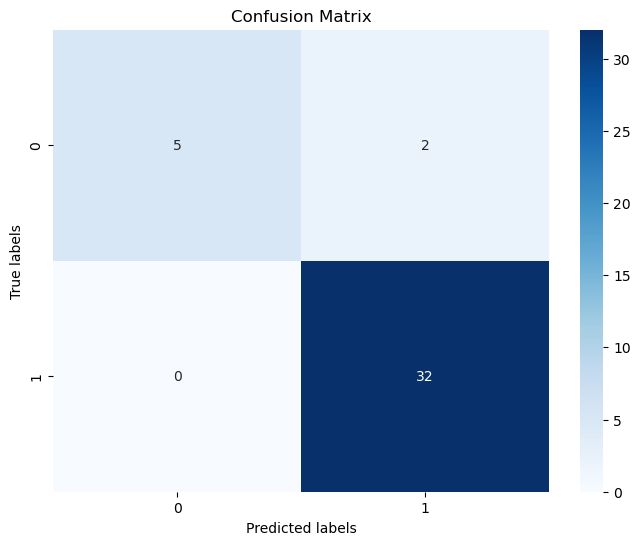

In \[38\]:

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    Classification Report:
                  precision    recall  f1-score   support

               0       1.00      0.71      0.83         7
               1       0.94      1.00      0.97        32

        accuracy                           0.95        39
       macro avg       0.97      0.86      0.90        39
    weighted avg       0.95      0.95      0.95        39

In \[39\]:

    # Feature Importance Plot
    feature_importances = rf_classifier.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), feature_importances[indices],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

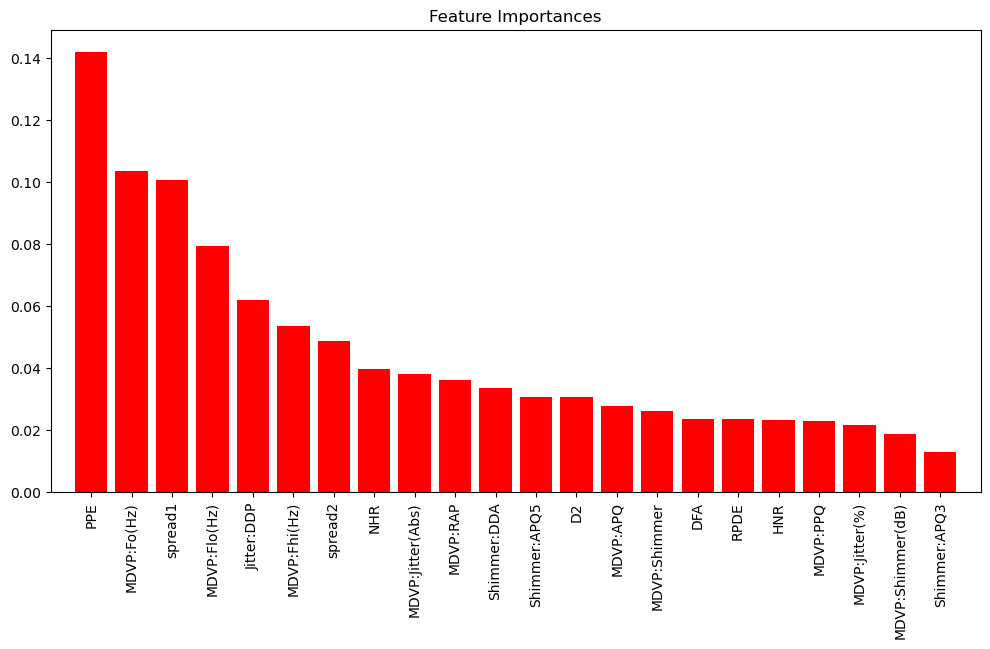

In \[40\]:

    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    # Step 1: Load the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    parkinsons_df = pd.read_csv(url)

    # Step 2: Data Preprocessing
    # Dropping unnecessary columns
    parkinsons_df.drop(['name'], axis=1, inplace=True)

    # Splitting features and target variable
    X = parkinsons_df.drop(['status'], axis=1)
    y = parkinsons_df['status']

    # Step 3: Exploratory Data Analysis (EDA)
    # Let's plot a histogram of some features
    parkinsons_df.hist(bins=20, figsize=(15,10))
    plt.show()

    # Step 4: Model Training and Prediction
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)

    # Making predictions
    y_pred = rf_classifier.predict(X_test_scaled)

    # Step 5: Plotting
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Feature Importance Plot
    feature_importances = rf_classifier.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X_train.shape[1]), feature_importances[indices],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

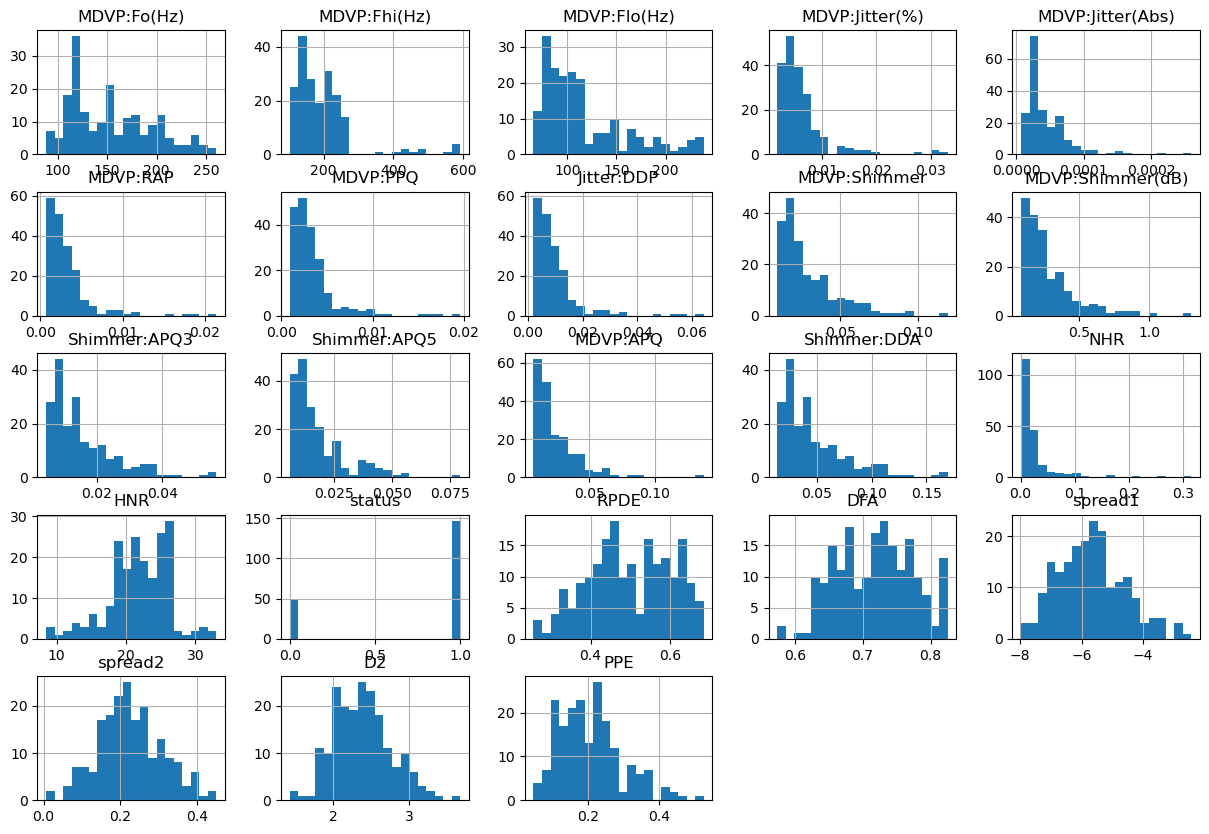

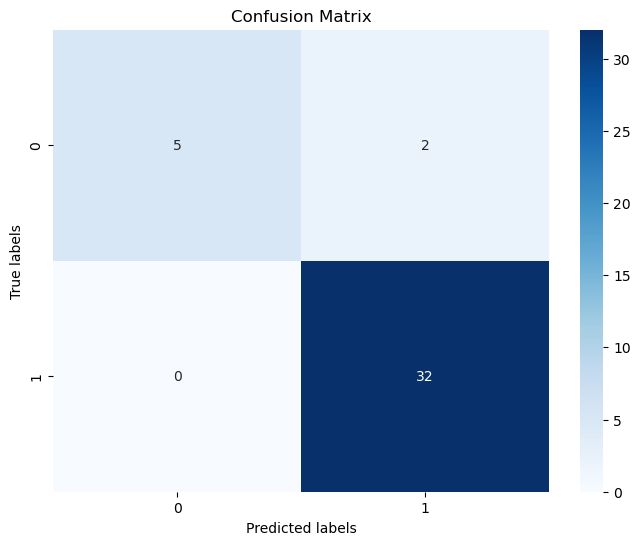

    Classification Report:
                  precision    recall  f1-score   support

               0       1.00      0.71      0.83         7
               1       0.94      1.00      0.97        32

        accuracy                           0.95        39
       macro avg       0.97      0.86      0.90        39
    weighted avg       0.95      0.95      0.95        39

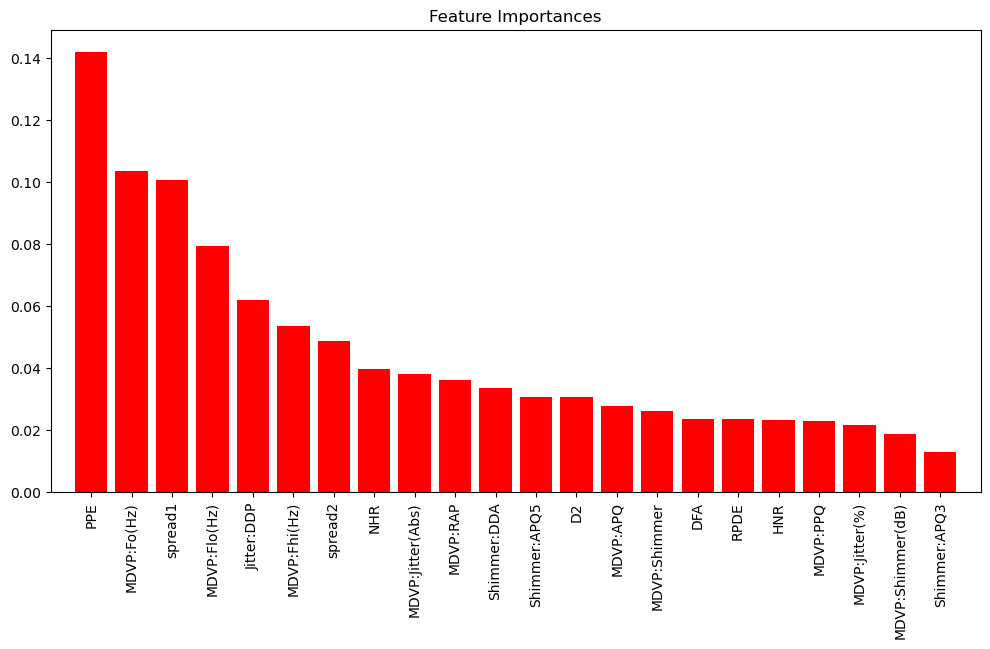

In \[16\]:

    pip install pandas numpy matplotlib scikit-learn seaborn

    Requirement already satisfied: pandas in c:\users\amrendra mishra\anaconda3\lib\site-packages (2.0.3)Note: you may need to restart the kernel to use updated packages.

    WARNING: Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF5415D0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/joblib/
    WARNING: Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BABFD9F10>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/joblib/
    WARNING: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF539990>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/joblib/
    WARNING: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF5124D0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/joblib/
    WARNING: Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF4F6150>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/joblib/
    WARNING: Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF5056D0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/scikit-learn/
    WARNING: Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF4FDB90>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/scikit-learn/
    WARNING: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF541850>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/scikit-learn/
    WARNING: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF4DCB90>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/scikit-learn/
    WARNING: Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000029BAF52D350>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/scikit-learn/
    ERROR: Could not find a version that satisfies the requirement joblib>=1.2.0 (from scikit-learn) (from versions: none)
    ERROR: No matching distribution found for joblib>=1.2.0

    Requirement already satisfied: numpy in c:\users\amrendra mishra\anaconda3\lib\site-packages (1.24.3)
    Requirement already satisfied: matplotlib in c:\users\amrendra mishra\anaconda3\lib\site-packages (3.7.2)
    Requirement already satisfied: scikit-learn in c:\users\amrendra mishra\anaconda3\lib\site-packages (1.4.1.post1)
    Requirement already satisfied: seaborn in c:\users\amrendra mishra\anaconda3\lib\site-packages (0.12.2)
    Requirement already satisfied: python-dateutil>=2.8.2 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from pandas) (2.8.2)
    Requirement already satisfied: pytz>=2020.1 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from pandas) (2023.3.post1)
    Requirement already satisfied: tzdata>=2022.1 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from pandas) (2023.3)
    Requirement already satisfied: contourpy>=1.0.1 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (1.0.5)
    Requirement already satisfied: cycler>=0.10 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (0.11.0)
    Requirement already satisfied: fonttools>=4.22.0 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (4.25.0)
    Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (1.4.4)
    Requirement already satisfied: packaging>=20.0 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (23.1)
    Requirement already satisfied: pillow>=6.2.0 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (9.4.0)
    Requirement already satisfied: pyparsing<3.1,>=2.3.1 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from matplotlib) (3.0.9)
    Requirement already satisfied: scipy>=1.6.0 in c:\users\amrendra mishra\anaconda3\lib\site-packages (from scikit-learn) (1.11.1)
    INFO: pip is looking at multiple versions of scikit-learn to determine which version is compatible with other requirements. This could take a while.

In \[42\]:

    # Importing necessary libraries
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[43\]:

    # Selecting two features for visualization (you can choose any two features)
    feature1 = 'spread1'
    feature2 = 'spread2'

In \[45\]:

    feature1

Out\[45\]:

    'spread1'

In \[44\]:

    feature2

Out\[44\]:

    'spread2'

In \[46\]:

    # Plotting the dataset with different colors for different classes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, data=parkinsons_df, hue='status', palette='coolwarm', s=100)
    plt.title('Parkinson\'s Disease Dataset')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Status')
    plt.show()

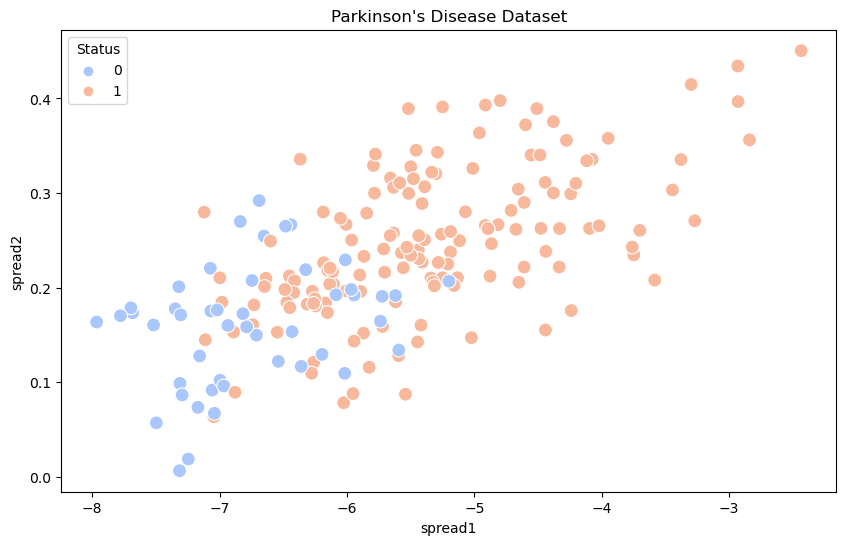

In \[ \]:

     

In \[ \]:

     

In \[ \]: